# Traveling salesman with GA 

### Module Import

In [43]:
import numpy as np
import matplotlib as plt
 #notebook or inline 
%matplotlib inline
plt.rcParams["figure.figsize"]=(16,8)
from math import sqrt
from random import randint
from random import random

#For some cool widgets
from ipywidgets import FloatProgress
from IPython.display import display


### Read the cities file

200 cities read


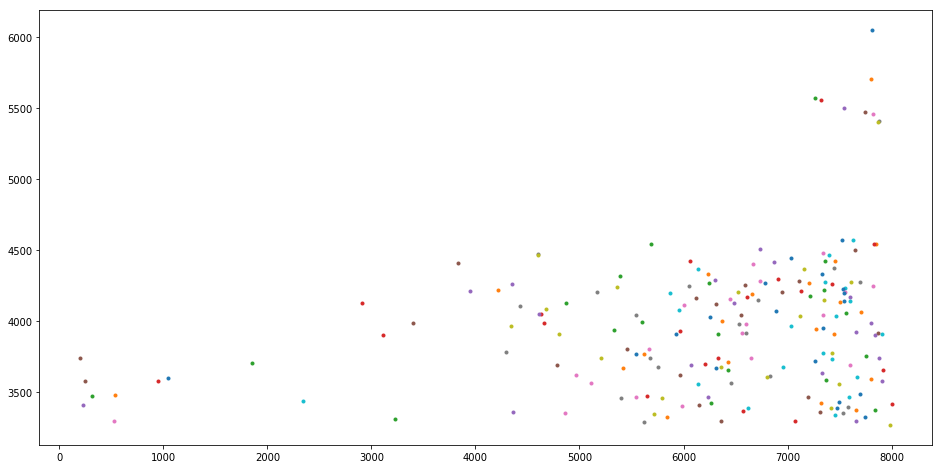

In [44]:
city_list=np.loadtxt('200.txt').astype(int)
print(str(len(city_list)) + " cities read")
#show the map
for city in city_list:
    plt.pyplot.plot(city[1],city[2],'.')
plt.pyplot.show()

### Set the initial parameters

In [45]:
nindividuals=1000
ncities=len(city_list)

tournamentsize=10

cx_probability=0.9
mx_probability=0.1
max_iterations=750

## Define general funtions

### Euclidean Distance

In [46]:
def euclidian_distance(x1,y1,x2,y2):
    dist= sqrt((x1-x2)**2+(y1-y2)**2)
    return dist

In [47]:
euclidian_distance(0,0,1,1)

1.4142135623730951

### Calculate fitness

In [48]:
def calculate_fitness(individual):
    fitness=0
    #First element
    fitness=euclidian_distance(city_list[individual[0]][1],city_list[individual[0]][2],
                               city_list[individual[1]][1],city_list[individual[0]][2])
    for i in range(1,len(individual)-1):
        fitness=fitness+euclidian_distance(city_list[individual[i]][1],city_list[individual[i]][2],
                                           city_list[individual[i+1]][1],city_list[individual[i+1]][2])
    return fitness

### Mutation

In [49]:
def mutate(individual):
    #reverse mutation
    init_pos=np.random.randint(0,len(individual))
    end_pos=np.random.randint(init_pos,len(individual)+1)
    mutated_individual= np.concatenate((individual[:init_pos],
                                        individual[init_pos:end_pos][::-1],
                                        individual[end_pos:]),axis=0)
    return mutated_individual

### Crossover

In [50]:
def crossover(individual1,individual2):
    splitpoint=randint(0,len(individual1)-1)
    result1=np.copy(individual1)
    result2=np.copy(individual2)
    currpos=splitpoint
    firstval=individual1[splitpoint]
    newpos=0
    
    cycleover=False
    
    while True:
         
            
        result1[currpos]=individual2[currpos]
        result2[currpos]=individual1[currpos]



        newpos=np.where(individual1==individual2[currpos])

        currval=individual2[currpos]

        if firstval==currval:#individual2[currpos]:

            cycleover=True        

        currpos=newpos
        if cycleover:
            break

   
    return(result1,result2)

In [51]:
#crossover(population[3],population[21])



### Tournament Selection

In [52]:
def tournament_selection(pop, tournament_size):
    
    champion=population[np.random.randint(len(pop))]
    champion_fitness=calculate_fitness(champion)
    
    for i in range(0,tournament_size):
        tmpind=population[np.random.randint(len(pop))]
        tmpind_fitness=calculate_fitness(tmpind)
        if tmpind_fitness<champion_fitness:
            champion=tmpind[:]
            champion_fitness=tmpind_fitness
    return champion

### Initialization

In [53]:
population=np.zeros((nindividuals,ncities),dtype=int)
for individual in range(0,nindividuals):
    population[individual]=np.arange(ncities)
    np.random.shuffle(population[individual])

In [54]:
population

array([[ 44,  13, 199, ...,  49,  15,  35],
       [184,  14, 164, ..., 180, 127, 139],
       [160, 168, 132, ...,   7, 154, 196],
       ..., 
       [ 69,  65,  85, ..., 180,  83, 114],
       [199,  93, 196, ...,  95,  80,  24],
       [199, 103, 196, ...,  34,  19, 180]])

In [55]:
ncities

200

In [56]:
def draw_scatter_plot():
    ##prepare scatter
    xx=list()
    xx[:]=()
    yy=list()
    yy[:]=()

    best_individual=0
    best_individual_fitness= calculate_fitness(population[0])

    tot=0
    
    for i in range(0,nindividuals):
        cfit=calculate_fitness(population[i])
        tot=tot+cfit
        if cfit<best_individual_fitness:
            best_individual=i
            best_individual_fitness=calculate_fitness(population[i])


    for i in population[best_individual]:
        xx.append(city_list[i][1])
        yy.append(city_list[i][2])

    print("Best individual is number " + str(best_individual) + " with a fitness of " + str(best_individual_fitness))
    print("Average fitness is " + str(tot/len(population)))

    plt.pyplot.scatter(xx,yy,c='r',marker='o')
    plt.pyplot.plot(xx,yy)
    plt.pyplot.show()

Best individual is number 378 with a fitness of 313567.22359739273
Average fitness is 374845.7835658061


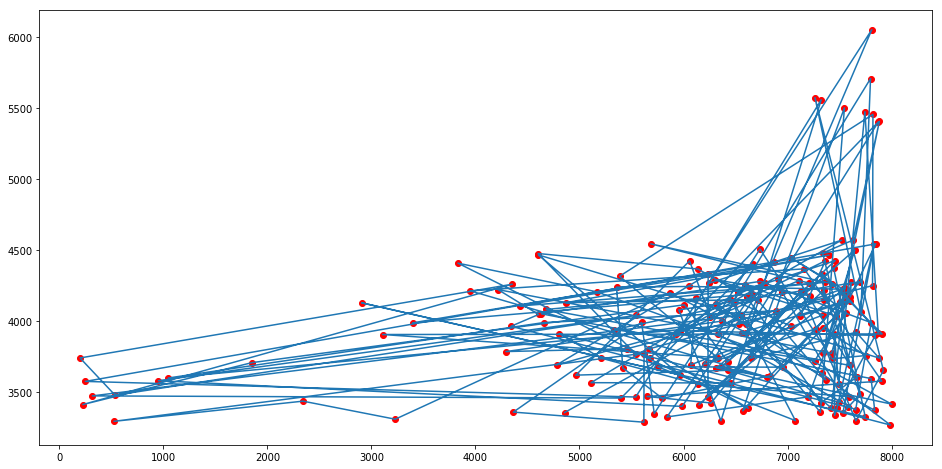

In [57]:
draw_scatter_plot()

In [58]:
x=[3,4,5,6]
sum(x)

18

FloatProgress(value=0.0, max=750.0)

------0
Best individual is number 378 with a fitness of 313567.22359739273
Average fitness is 374845.7835658061


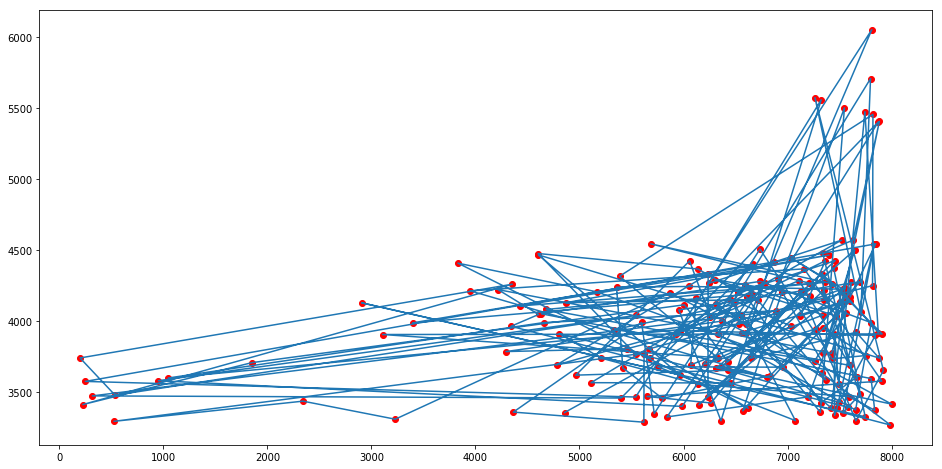

------15
Best individual is number 211 with a fitness of 249587.88536113326
Average fitness is 259411.95303768164


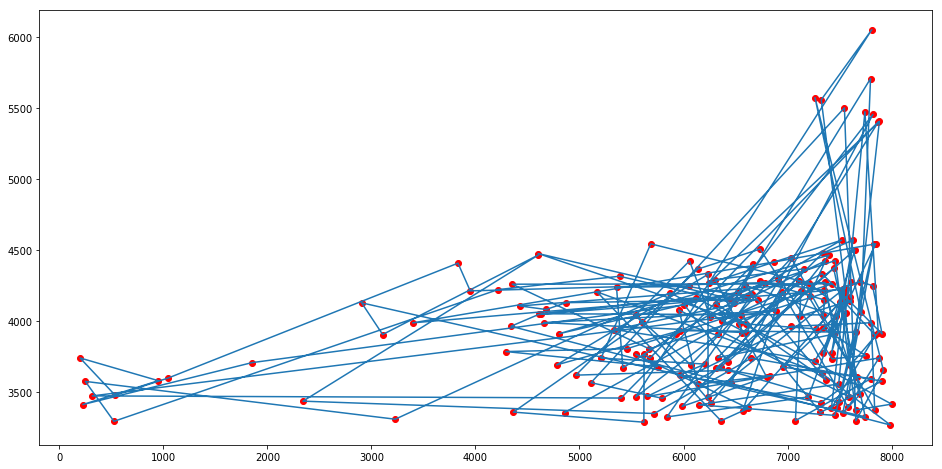

------30
Best individual is number 6 with a fitness of 215842.73903030017
Average fitness is 222822.72898618501


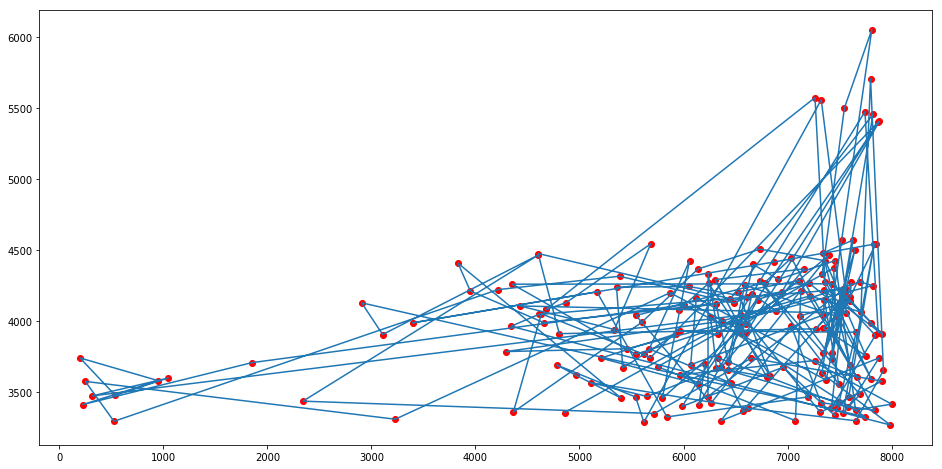

------45
Best individual is number 550 with a fitness of 195969.72661712317
Average fitness is 201375.8942469894


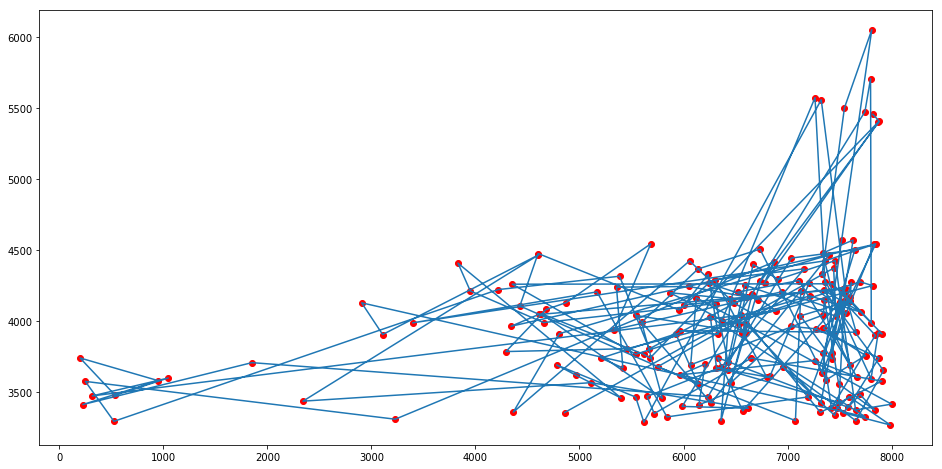

------60
Best individual is number 263 with a fitness of 178933.43809765927
Average fitness is 182783.77394619145


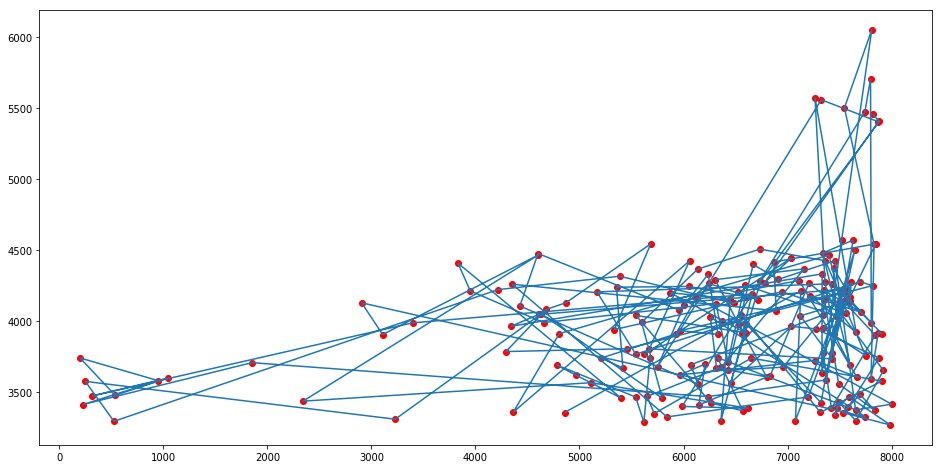

------75
Best individual is number 317 with a fitness of 168056.96402215114
Average fitness is 172874.5167857951


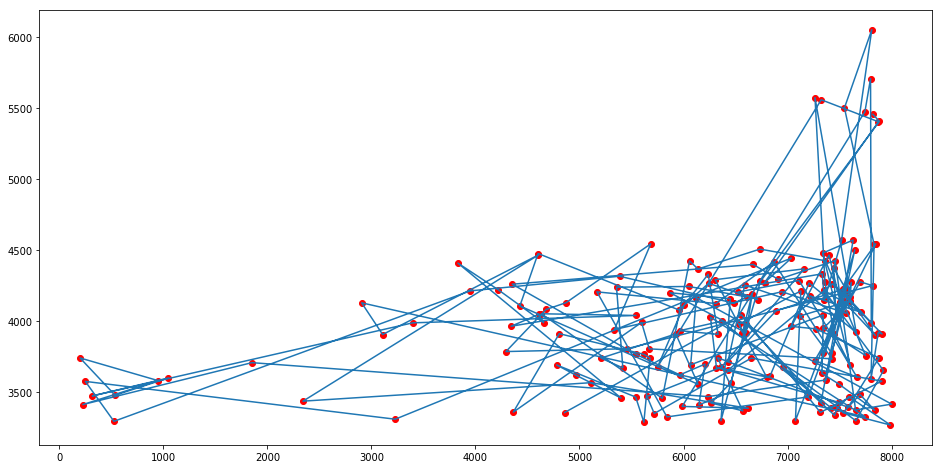

------90
Best individual is number 31 with a fitness of 154822.33566454664
Average fitness is 161880.56537451126


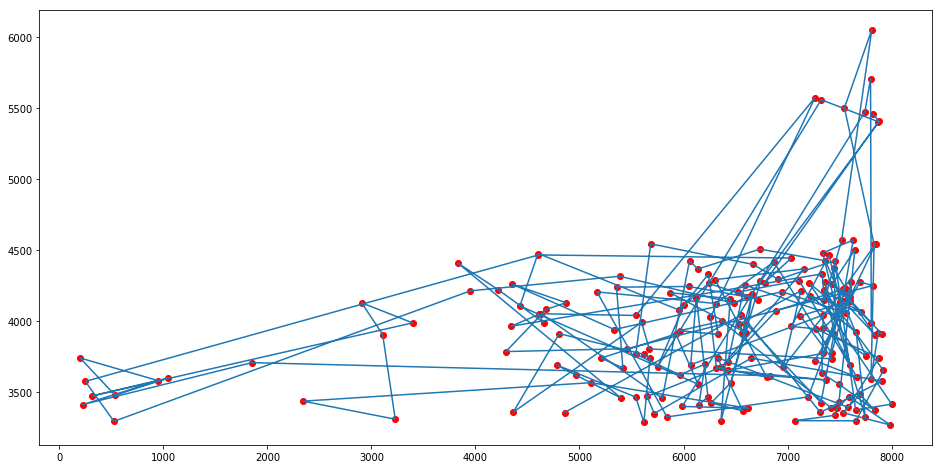

------105
Best individual is number 881 with a fitness of 140149.98128618574
Average fitness is 145827.92533849872


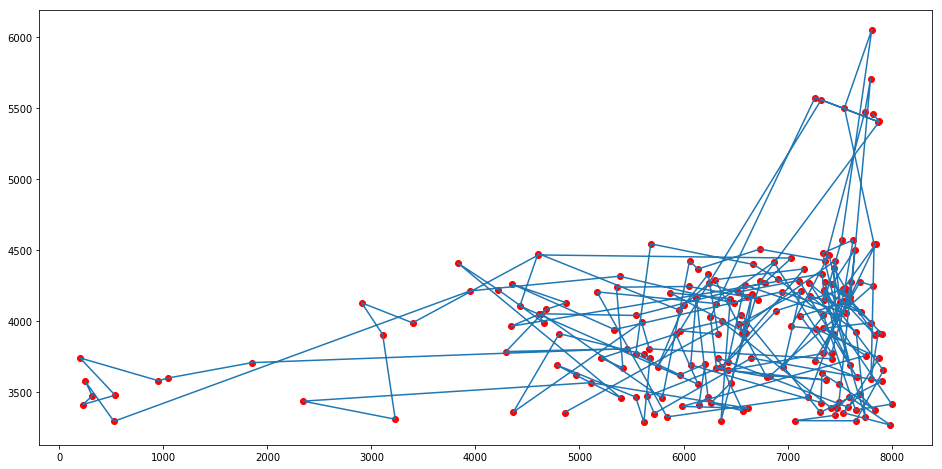

------120
Best individual is number 100 with a fitness of 133276.95901116918
Average fitness is 135447.6015529984


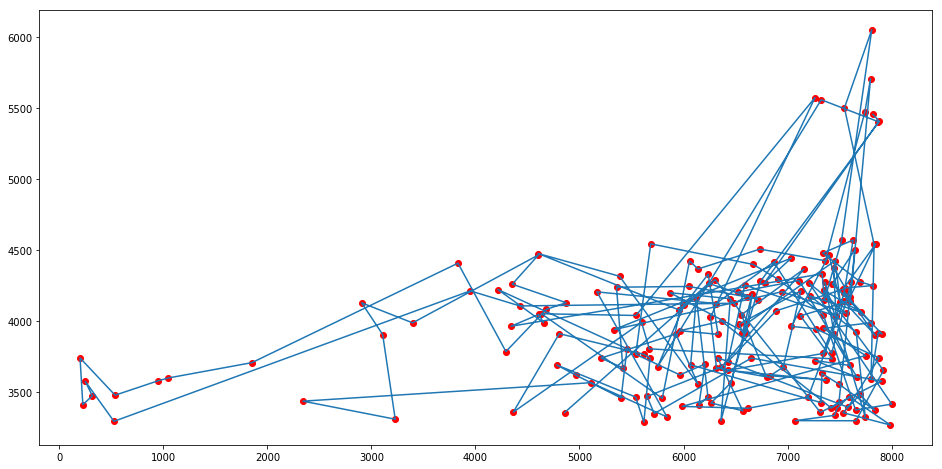

------135
Best individual is number 737 with a fitness of 122523.41030085468
Average fitness is 127526.61408879617


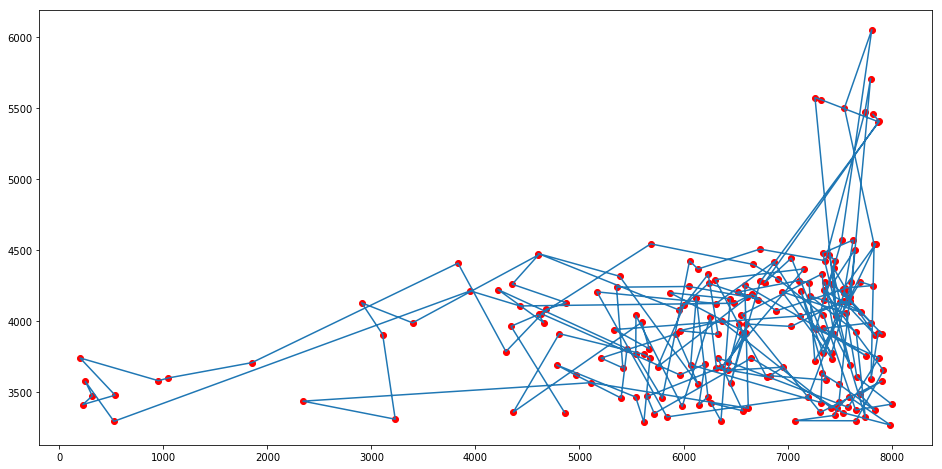

------150
Best individual is number 214 with a fitness of 115520.93484149361
Average fitness is 117461.2706892378


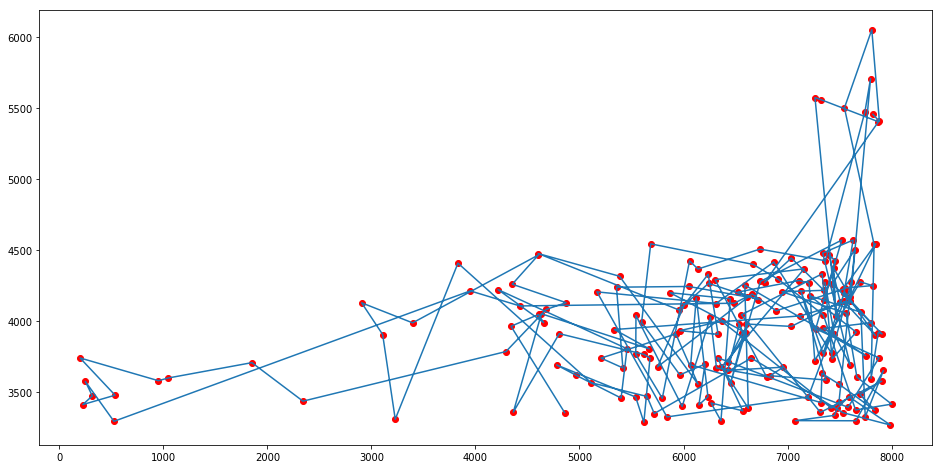

In [ ]:
bxplot=list()
bxplot[:]=[]

max_iterations=max_iterations

f = FloatProgress(min=0, max=max_iterations) # instantiate the bar
display(f) # display the bar
f.value=0

for j in range(0,max_iterations):
    #initialize empty population
    tmp_population=np.zeros((nindividuals,ncities),dtype=int)
    
    bxpltseries=list()
    bxpltseries[:]=[]
    
    for i in range(0,int(nindividuals/2)):
        tmpa = tournament_selection(population,tournamentsize)
        tmpa_fitness = calculate_fitness(tmpa)

        tmpb = tournament_selection(population,tournamentsize)
        #tmpb_fitness = calculate_fitness(tmpb)
        
        tmpc,tmpd=crossover(tmpa,tmpb)
        
        #print(tmp_fitness)
        bxpltseries.append(tmpa_fitness)
        #print(tmp)
        #print(tmp.shape)
        
        
        #tmp2=mutate(tmpc)
        #tmp_population[i]=tmp2[:]
        
        #tmp3=mutate(tmpd)
        #tmp_population[int(nindividuals/2)+i]=tmp3[:]
        if mx_probability>random():
            tmp2=mutate(tmpc)
            tmp_population[i]=tmp2[:]
        
            tmp3=mutate(tmpd)
            tmp_population[int(nindividuals/2)+i]=tmp3[:]
        
        else:
            tmp_population[i]=tmpc[:]
            tmp_population[int(nindividuals/2)+i]=tmpd[:]
    
    if j%15==0:
        print('------' + str(j))
        bxplot.append(bxpltseries)
        draw_scatter_plot()
    
    population=tmp_population[:]
    f.value += 1
    
f.close() #hide progressbar

### Visualize the resulting fitnesses

In [ ]:
plt.pyplot.boxplot(bxplot)

plt.pyplot.show()